# Handling Outliers using IQR Proximity

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

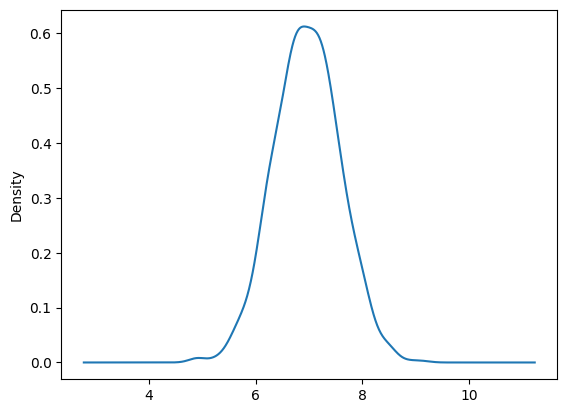

In [3]:
df['cgpa'].plot(kind='kde')

<Axes: ylabel='Density'>

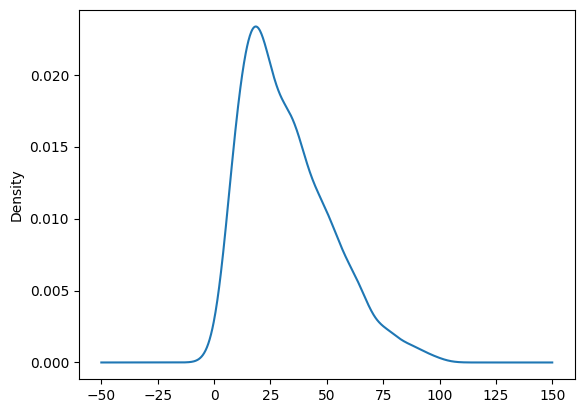

In [4]:
df['placement_exam_marks'].plot(kind='kde')

<Axes: >

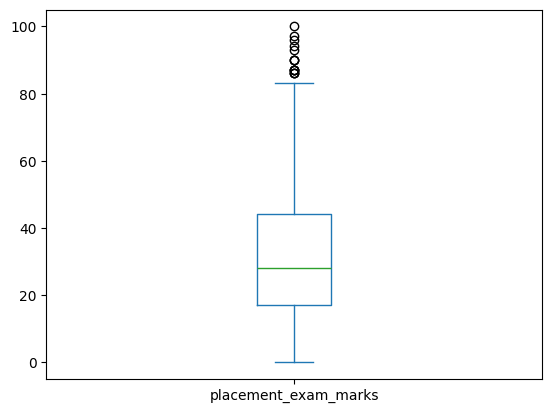

In [5]:
df['placement_exam_marks'].plot(kind='box')

# Trimming

In [6]:
# finding 25 and 75 percentile values
q1 = df['placement_exam_marks'].quantile(q=0.25)
q3 = df['placement_exam_marks'].quantile(q=0.75)

In [8]:
# finding iqr
iqr = q3 - q1

In [9]:
iqr

np.float64(27.0)

In [11]:
# IQR Proximity
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

In [22]:
print('Upper limit: ',upper_limit)
print('Lower limit: ',lower_limit)

Upper limit:  84.5
Lower limit:  -23.5


In [12]:
# Preview of outliers
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [17]:
# Removing outlier
new_df = df[(df['placement_exam_marks'] <= upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [18]:
print('Before Trimming: ',df.shape)
print('After Trimming: ',new_df.shape)

Before Trimming:  (1000, 3)
After Trimming:  (985, 3)


In [20]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [21]:
new_df['placement_exam_marks'].describe()

,placement_exam_marks
count,985.000000
mean,31.339086
std,17.857633
min,0.000000
25%,17.000000
50%,28.000000
75%,43.000000
max,83.000000


<Axes: >

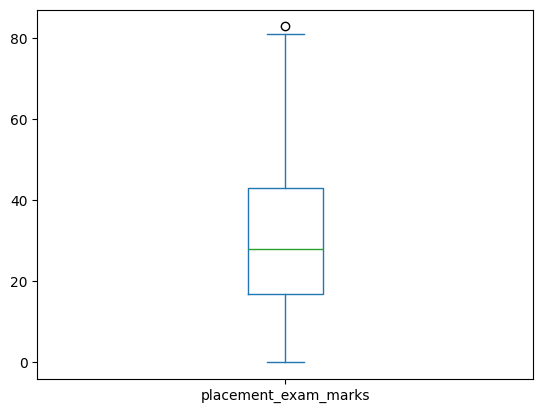

In [19]:
new_df['placement_exam_marks'].plot(kind='box')

# Capping

In [24]:
new_df_cap = df['placement_exam_marks'].clip(lower_limit,upper_limit)

In [25]:
new_df_cap.describe()

,placement_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000


<Axes: >

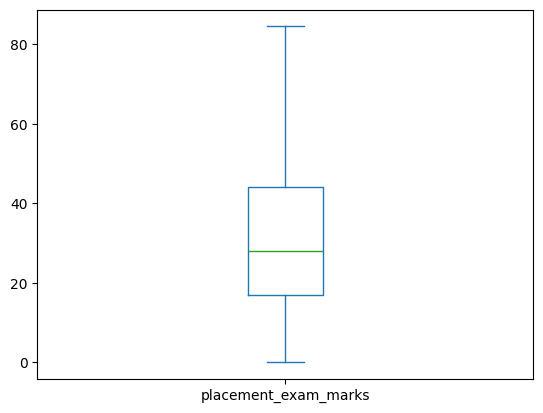

In [27]:
new_df_cap.plot(kind='box')